# Properties of summer-months flights

In [2]:
dataset_meta = DatasetMeta(SchemaName.FLIGHTS, FlightsDatasetName.DATASET2)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
65,65,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
71,71,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
104,104,B6,BOS,BWI,727,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
108,108,DL,BOS,DTW,2079,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
121,121,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('delay_reason'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('airline'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    FilterAction(filtered_column=Column('month'), filter_operator=FilterOperator.GREATER,
             filter_term='7'),
    FilterAction(filtered_column=Column('month'), filter_operator=FilterOperator.LOWER,
         filter_term='8'),
    GroupAction(grouped_column=Column('delay_reason'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('airline'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('scheduled_trip_time'), aggregated_column=Column('flight_id'),
        aggregation_function=AggregationFunction.COUNT),
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

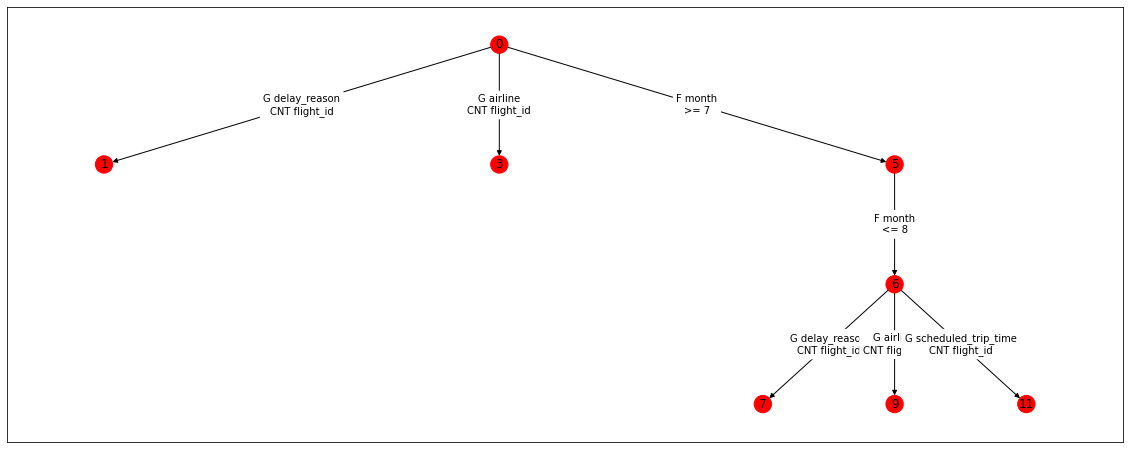

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by delay_reason CNT(flight_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,flight_id
delay_reason,
None,6233
AIR_SYSTEM,908
LATE_AIRCRAFT,485
AIRLINE,449
WEATHER,96
SECURITY,1


### Query 3: <span style="color:blue;">Group by airline CNT(flight_id)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 2))

,flight_id
airline,
B6,3030
US,1270
DL,1186
AA,810
WN,671
UA,667
EV,168
VX,120
NK,118


### Query 5: <span style="color:blue;">Filter month >= 7</span>

In [7]:
display(prepare_display(action_execution_result_lst, 4))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
30780,30780,US,BOS,CLT,1837,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,6,3,7
30801,30801,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,6,3,7
30812,30812,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,6,3,7
30865,30865,WN,BOS,BWI,4255,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,6,3,7
30898,30898,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440852,440852,WN,BOS,BWI,382,LATE_AIRCRAFT,LARGE_DELAY,MID_FLIGHT,EVENING,EVENING,4,29,8
441033,441033,B6,BOS,DCA,1189,None,ON_TIME,MID_FLIGHT,EVENING,EVENING,4,29,8
441070,441070,US,BOS,DCA,2131,None,ON_TIME,MID_FLIGHT,EVENING,EVENING,4,29,8
441099,441099,DL,BOS,LGA,2695,AIRLINE,MID_DELAY,SHORT_FLIGHT,EVENING,EVENING,4,29,8


### Query 6: <span style="color:DimGray">Filter month >= 7 AND</span> <span style="color:blue;">Filter month <= 8</span>

In [8]:
display(prepare_display(action_execution_result_lst, 5))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
30780,30780,US,BOS,CLT,1837,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,6,3,7
30801,30801,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,6,3,7
30812,30812,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,6,3,7
30865,30865,WN,BOS,BWI,4255,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,6,3,7
30898,30898,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440852,440852,WN,BOS,BWI,382,LATE_AIRCRAFT,LARGE_DELAY,MID_FLIGHT,EVENING,EVENING,4,29,8
441033,441033,B6,BOS,DCA,1189,None,ON_TIME,MID_FLIGHT,EVENING,EVENING,4,29,8
441070,441070,US,BOS,DCA,2131,None,ON_TIME,MID_FLIGHT,EVENING,EVENING,4,29,8
441099,441099,DL,BOS,LGA,2695,AIRLINE,MID_DELAY,SHORT_FLIGHT,EVENING,EVENING,4,29,8


### Query 7: <span style="color:DimGray">Filter month >= 7 AND Filter month <= 8 AND</span> <span style="color:blue;">Group by delay_reason CNT(flight_id)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 6))

,flight_id
delay_reason,
None,2023
AIR_SYSTEM,329
AIRLINE,154
LATE_AIRCRAFT,147
WEATHER,40
SECURITY,1


### Query 9: <span style="color:DimGray">Filter month >= 7 AND Filter month <= 8 AND</span> <span style="color:blue;">Group by airline CNT(flight_id)</span>

In [10]:
display(prepare_display(action_execution_result_lst, 8))

,flight_id
airline,
B6,969
US,445
DL,413
AA,254
UA,232
WN,216
EV,52
VX,36
NK,35


### Query 11: <span style="color:DimGray">Filter month >= 7 AND Filter month <= 8 AND</span> <span style="color:blue;">Group by scheduled_trip_time CNT(flight_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 10))

,flight_id
scheduled_trip_time,
LONG_FLIGHT,1192
MID_FLIGHT,1054
SHORT_FLIGHT,448
